# Problem Set 8

## The Ho-Lee Model and Nelson-Siegel Fitting


## Problem 1: Zero Coupon Bond Prices and Forward Rates in the Ho-Lee Model

### Purpose
Derive the affine term structure for zero coupon bond prices in the Ho-Lee model and show how forward rates can be computed in two different ways: directly from ZCB price dynamics and using the Heath-Jarrow-Morton (HJM) drift condition.

### Intuition
The Ho-Lee model is a no-arbitrage interest rate model where the short rate follows:
$$dr_t = \Theta(t)dt + \sigma dW_t$$

The model has constant volatility $\sigma$ and a time-dependent drift $\Theta(t)$ that can be calibrated to match the initial term structure. Since both drift and diffusion are affine functions of the short rate, the model admits an affine term structure for bond prices.

### 1.a) Affine Term Structure

**Mathematical Derivation:**

Since the drift $\Theta(t)$ and squared diffusion coefficient $\sigma^2$ are both affine in $r_t$, the Ho-Lee model admits an affine term structure:

$$p(t,T) = e^{A(t,T) - B(t,T)r_t}$$

where $A(t,T)$ and $B(t,T)$ satisfy the system of ODEs:

$$\begin{align}
A_t(t,T) &= \Theta(t)B(t,T) - \frac{1}{2}\sigma^2 B^2(t,T), \quad A(T,T) = 0 \\
B_t(t,T) &= -1, \quad B(T,T) = 0
\end{align}$$

The equation for $B(t,T)$ is trivial to solve:
$$B(t,T) = T - t$$

For $A(t,T)$, we integrate:
$$A(t,T) = \int_t^T \left[\frac{1}{2}\sigma^2 B^2(s,T) - \Theta(s)B(s,T)\right]ds$$

Substituting $B(s,T) = T-s$:
$$A(t,T) = \int_t^T \left[\frac{1}{2}\sigma^2(T-s)^2 - \Theta(s)(T-s)\right]ds$$

$$= \frac{\sigma^2}{2} \int_t^T (T-s)^2 ds - \int_t^T \Theta(s)(T-s)ds$$

$$= \frac{\sigma^2}{2} \cdot \frac{(T-t)^3}{3} + \int_t^T \Theta(s)(s-T)ds$$

Therefore:
$$\boxed{A(t,T) = \frac{\sigma^2}{2}\frac{(T-t)^3}{3} + \int_t^T \Theta(s)(s-T)ds, \quad B(t,T) = T-t}$$

---

### 1.b) Forward Rates from ZCB Prices

To use the Ho-Lee model in practice, we would need to fit the model to observed forward rates $f^*(0,t)$ and thereby find $\Theta(t)$. This involves computing the integral found above to find A(t,T) - which we already did.  

**Mathematical Derivation:**

Forward rates are defined as:
$$f(t,T) = -\frac{\partial}{\partial T}\ln p(t,T)$$

Using $p(t,T) = e^{A(t,T) - B(t,T)r_t}$:
$$f(t,T) = -\frac{\partial}{\partial T}[A(t,T) - B(t,T)r_t]$$

$$\boxed{f(t,T) = -\frac{\partial A(t,T)}{\partial T} + r_t\frac{\partial B(t,T)}{\partial T}}$$

- Lets notice that the deterministic part $A(t,T)$ is seperate from the stochastic part $r_t$. Later we will see that the forward rate dynamics are independent of $\Theta(t)$.

---


### 1.c) Forward Rate Dynamics - Direct Approach

**Mathematical Derivation:**

To find forward rate dynamics, we apply Ito's formula and the product rule:
$$df(t,T) = \frac{\partial}{\partial T}d[-A_T(t,T) + r_t B_T(t,T)]$$


Since $A_T$ and $B_T$ are non-stochastic:

$$\boxed{df(t,T) = -\frac{\partial}{\partial T}[A_t(t,T)dt + B_t(t,T)r_t dt + B(t,T)dr_t]}$$

---

### 1.d) Explicit Forward Rate Dynamics

**Mathematical Derivation:**

From the ODE system, we have:
- $A_t(t,T) = \Theta(t)B(t,T) - \frac{1}{2}\sigma^2 B^2(t,T)$
- $B_t(t,T) = -1$
- $B(t,T) = T-t$, so $B_T(t,T) = 1$
- $dr_t = \Theta(t)dt + \sigma dW_t$

Substituting into the expression from (c):
$$df(t,T) = -\frac{\partial}{\partial T}\left[\Theta(t)(T-t)dt - \frac{\sigma^2}{2}(T-t)^2dt - r_t dt + (T-t)(\Theta(t)dt + \sigma dW_t)\right]$$

Taking derivatives with respect to $T$:
$$df(t,T) = -\left[\Theta(t)dt - \sigma^2(T-t)dt + \Theta(t)dt + \sigma dW_t\right]$$

$$\boxed{df(t,T) = \sigma^2(T-t)dt + \sigma dW_t}$$

**Key Insight:** The drift term $\sigma^2(T-t)$ and the diffusion term $\sigma$ do not depend on $\Theta(t)$, making the forward rate dynamics independent of the drift calibration function.

---

### 1.e) Forward Rates from Explicit ZCB Formula

**Mathematical Derivation:**

In the Ho-Lee model, ZCB prices can be expressed as:
$$p(t,T) = \frac{p^*(0,T)}{p^*(0,t)} \exp\left\{(T-t)f^*(0,t) - \frac{\sigma^2}{2}t(T-t)^2 - (T-t)r_t\right\}$$

where $p^*(0,T)$ are observed market ZCB prices and $f^*(0,T)$ are observed forward rates.

Forward rates are:
$$f(t,T) = -\frac{\partial}{\partial T}\ln p(t,T)$$

$$= -\frac{\partial}{\partial T}\left[\ln p^*(0,T) - \ln p^*(0,t) + (T-t)f^*(0,t) - \frac{\sigma^2}{2}t(T-t)^2 - (T-t)r_t\right]$$

---

### 1.f) Forward Rate Dynamics via Ito's Formula

**Mathematical Derivation:**

Treating $f(t,T) = g(t,T,r_t)$ and applying Ito's formula:
$$df(t,T) = \frac{\partial g}{\partial t}dt + \frac{\partial g}{\partial r_t}dr_t + \frac{1}{2}\frac{\partial^2 g}{\partial r_t^2}(dr_t)^2$$

From the expression in (e):
- $\frac{\partial g}{\partial r_t} = 1$
- $\frac{\partial^2 g}{\partial r_t^2} = 0$
- $\frac{\partial g}{\partial t}$ involves $\frac{\partial f^*(0,t)}{\partial t} + \sigma^2(T-t)$ plus other terms

The diffusion coefficient is:
$$\frac{\partial g}{\partial r_t}\sigma = \sigma$$

Therefore:
$$\boxed{df(t,T) = \alpha(t,T)dt + \sigma dW_t}$$

where $\alpha(t,T)$ is yet to be determined.

---

### g) HJM Drift Condition

**Mathematical Derivation:**

The Heath-Jarrow-Morton (HJM) drift condition states that to prevent arbitrage, the drift of forward rates must satisfy:
$$\alpha(t,T) = \sigma(t,T)\int_t^T \sigma(t,s)ds$$

In the Ho-Lee model, $\sigma(t,T) = \sigma$ (constant). Therefore:
$$\alpha(t,T) = \sigma \int_t^T \sigma ds = \sigma^2(T-t)$$

This gives:
$$\boxed{df(t,T) = \sigma^2(T-t)dt + \sigma dW_t}$$

**Key Result:** This matches the result from part (d), confirming consistency between the two approaches and verifying the no-arbitrage condition.

---
---

## Problem 2: Zero Coupon Bond Dynamics and Option Pricing

### Purpose
Derive ZCB price dynamics using two methods and understand their properties under the risk-neutral measure, culminating in pricing a European call option on a zero coupon bond.

### Intuition
Zero coupon bonds in the Ho-Lee model follow geometric Brownian motion with drift equal to the short rate under the risk-neutral measure. This fundamental property ensures no-arbitrage and allows us to price derivatives using standard techniques.

---

### 2.a) ZCB Dynamics from Forward Rate Dynamics

**Mathematical Derivation:**

We use the relationship between ZCB prices and forward rates:
$$p(t,T) = \exp\left(-\int_t^T f(t,s)ds\right)$$

Given that $df(t,T) = \alpha(t,T)dt + \sigma'(t,T)dW_t$ with $\alpha(t,T) = \sigma^2(T-t)$ and $\sigma'(t,T) = \sigma$, we have:

$$A(t,T) = -\int_t^T \alpha(t,s)ds = -\int_t^T \sigma^2(s-t)ds = -\frac{\sigma^2}{2}(T-t)^2$$

$$S(t,T) = -\int_t^T \sigma'(t,s)ds = -\int_t^T \sigma ds = -\sigma(T-t)$$

The general formula for ZCB dynamics from forward rate dynamics is:
$$dp(t,T) = \left[r_t + A(t,T) + \frac{1}{2}\|S(t,T)\|^2\right]p(t,T)dt + S'(t,T)p(t,T)dW_t$$

- where $\|S(t,T)\|$ is the Euclidean norm.

Substituting:
$$dp(t,T) = \left[r_t - \frac{\sigma^2}{2}(T-t)^2 + \frac{\sigma^2}{2}(T-t)^2\right]p(t,T)dt - \sigma(T-t)p(t,T)dW_t$$

$$\boxed{dp(t,T) = r_t p(t,T)dt - \sigma(T-t)p(t,T)dW_t}$$

---

### 2.b) ZCB Dynamics via Ito's Formula

**Mathematical Derivation:**

In the Ho-Lee model, ZCB prices can be expressed as:
$$p(t,T) = \frac{p^*(0,T)}{p^*(0,t)} \exp\left\{(T-t)f^*(0,t) - \frac{\sigma^2}{2}t(T-t)^2 - (T-t)r_t\right\}$$

Using the explicit formula:
$$p(t,T) = \exp\left\{\ln p^*(0,T) - \ln p^*(0,t) + (T-t)f^*(0,t) - \frac{\sigma^2}{2}t(T-t)^2 - (T-t)r_t\right\}$$

Let $g(t,T,r_t) = p(t,T)$. Applying Ito's formula:
$$dp(t,T) = \frac{\partial g}{\partial t}dt + \frac{\partial g}{\partial r_t}dr_t + \frac{1}{2}\frac{\partial^2 g}{\partial r_t^2}(dr_t)^2$$

Computing derivatives:
- $\frac{\partial g}{\partial r_t} = -(T-t)p(t,T)$
- $\frac{\partial^2 g}{\partial r_t^2} = (T-t)^2 p(t,T)$
- $(dr_t)^2 = \sigma^2 dt$

The time derivative involves several terms. Using $\Theta(t) = \frac{\partial f^*(0,t)}{\partial T} + \sigma^2 t$:

$$\frac{\partial g}{\partial t}p^{-1}(t,T) = f^*(0,t) - f^*(0,t) + \frac{\partial f^*(0,t)}{\partial T}(T-t) - \frac{\sigma^2}{2}(T-t)^2 + \sigma^2 t(T-t) + r_t$$

After simplification:
$$\boxed{dp(t,T) = r_t p(t,T)dt - \sigma(T-t)p(t,T)dW_t}$$

This confirms the result from part (a).

---

### 2.c) Interpretation: Geometric Brownian Motion

**Analysis:**

The dynamics $dp(t,T) = r_t p(t,T)dt - \sigma(T-t)p(t,T)dW_t$ show that:

1. **Process Type:** Zero coupon bonds follow a Geometric Brownian Motion

2. **Drift:** The expected instantaneous return is $r_t$, the risk-free short rate

3. **Risk-Neutral Measure:** Under the risk neutral measure $\mathbb{Q}$, all tradable assets must have expected return equal to the short rate to prevent arbitrage. This is a fundamental property of the risk-neutral measure.
 
4. **Volatility:** The volatility $\sigma(T-t)$ decreases as bonds approach maturity, reflecting that bond price uncertainty diminishes as maturity approaches (prices converge to par value of 1).

**No-Arbitrage Implication:** 
If bonds had any drift other than $r_t$ under $\mathbb{Q}$, an arbitrage opportunity would exist by borrowing/lending at the short rate and taking positions in bonds. The equality of drifts ensures market completeness and absence of arbitrage.
- Under the risk neutral measure, The expected log-return to all zero coupon bond prices regardless of maturity is thus exactly the short rate.

---

### 2.d) Distribution of Forward Rates

**Mathematical Derivation:**

From the forward rate dynamics:
$$df(t,T) = \sigma^2(T-t)dt + \sigma dW_t$$

This is a stochastic differential equation with deterministic coefficients. Integrating from $t$ to $s$ where $t < s < T$:

$$f(s,T) = f(t,T) + \int_t^s \sigma^2(T-u)du + \int_t^s \sigma dW_u$$

$$= f(t,T) + \sigma^2\left[sT - \frac{s^2}{2} - tT + \frac{t^2}{2}\right] + \sigma(W_s - W_t)$$

$$= f(t,T) + \sigma^2\left[(s-t)T - \frac{s^2-t^2}{2}\right] + \sigma(W_s - W_t)$$

Since $W_s - W_t \sim N(0, s-t)$, we have:

$$\boxed{f(s,T)|\mathcal{F}_t \sim N\left(f(t,T) + \sigma^2\left[(s-t)T - \frac{s^2-t^2}{2}\right], \sigma^2(s-t)\right)}$$

**Gaussian Property:** Forward rates are Gaussian because they result from integrating a Gaussian process (Brownian motion) with deterministic drift.

---

### 2.e) European Call Option Pricing

**Mathematical Derivation:**

Using the change of numeraire technique from Bjørk Chapter 22, for a European call option with:
- Exercise date $T_1$
- Underlying: Zero coupon bond maturing at $T_2 > T_1$  
- Strike: $K$

When forward rates are Gaussian, the option price is:
$$\Pi(t; K, T_1, T_2) = p(t,T_2)\Phi(d_1) - Kp(t,T_1)\Phi(d_2)$$

where:
$$\sigma_{T_1,T_2}(t) = -\int_{T_1}^{T_2} \sigma(t,s)ds = -\sigma(T_2-T_1)$$

$$\Sigma^2_{T_1,T_2}(t) = \int_t^{T_1} \|\sigma_{T_1,T_2}(s)\|^2 ds = \sigma^2(T_2-T_1)^2(T_1-t)$$

$$d_1 = \frac{\ln\left(\frac{p(t,T_2)}{p(t,T_1)K}\right) + \frac{1}{2}\Sigma^2_{T_1,T_2}(t)}{\sqrt{\Sigma^2_{T_1,T_2}(t)}} = \frac{\ln\left(\frac{p(t,T_2)}{p(t,T_1)K}\right) + \frac{1}{2}\sigma^2(T_2-T_1)^2(T_1-t)}{\sigma(T_2-T_1)\sqrt{T_1-t}}$$

$$d_2 = d_1 - \sqrt{\Sigma^2_{T_1,T_2}(t)} = d_1 - \sigma(T_2-T_1)\sqrt{T_1-t}$$

$$\boxed{\Pi(t; K, T_1, T_2) = p(t,T_2)\Phi(d_1) - Kp(t,T_1)\Phi(d_2)}$$

**Interpretation:** This is analogous to Black-Scholes formula, reflecting the log-normal distribution of bond prices at $T_1$ when viewed from time $t$.

---
---

## Problem 3: Nelson-Siegel Function and Incomplete Gamma Functions

### Purpose
Derive the relationship between forward rates modeled as a Nelson-Siegel function and zero coupon bond prices, introducing the incomplete gamma function for analytical tractability.

### Intuition
The Nelson-Siegel function is a flexible parametric form that can capture various shapes of the yield curve (humped, monotonic, S-shaped). When forward rates follow this specification, ZCB prices can be expressed using incomplete gamma functions, which simplifies numerical implementation.

---

### 3.a) Relationship Between Forward Rates and ZCB Prices

**Mathematical Derivation:**

The fundamental relationship comes from the definition of forward rates:
$$f(t,T) = -\frac{\partial \ln p(t,T)}{\partial T}$$

Integrating both sides from $t$ to $T$:
$$\int_t^T f(t,s)ds = -\int_t^T \frac{\partial \ln p(t,s)}{\partial s}ds = -[\ln p(t,s)]_t^T = -\ln p(t,T) + \ln p(t,t)$$

Since $p(t,t) = 1$ (a bond always equals par at maturity), $\ln p(t,t) = 0$:

$$\boxed{p(t,T) = \exp\left(-\int_t^T f(t,s)ds\right)}$$

**Interpretation:** This shows that ZCB prices are determined by the integral of instantaneous forward rates, representing the cumulative discounting effect.

---

### 3.b) ZCB Prices with Nelson-Siegel Forward Rates

**Mathematical Derivation:**

Given the Nelson-Siegel specification:
$$f(t,T) = f_\infty + \sum_{k=0}^K a_k(T-t)^k e^{-b_k(T-t)}$$

Substituting into the ZCB formula:
$$p(t,T) = \exp\left(-\int_t^T f(t,s)ds\right)$$

$$= \exp\left(-\int_t^T \left[f_\infty + \sum_{k=0}^K a_k(s-t)^k e^{-b_k(s-t)}\right]ds\right)$$

$$= \exp\left(-f_\infty\int_t^T ds - \sum_{k=0}^K a_k\int_t^T (s-t)^k e^{-b_k(s-t)}ds\right)$$

$$= \exp\left(-f_\infty(T-t) - \sum_{k=0}^K a_k I_k\right)$$

where:
$$\boxed{I_k = \int_t^T (s-t)^k e^{-b_k(s-t)}ds}$$

**Key Insight:** The problem reduces to evaluating the integrals $I_k$, which will connect to incomplete gamma functions.

---

### 3.c) Change of Variables to Incomplete Gamma Form

**Mathematical Derivation:**

Let $u = b_k(s-t)$, so $s-t = u/b_k$ and $ds = du/b_k$.

When $s=t$: $u=0$  
When $s=T$: $u=b_k(T-t)$

Therefore:
$$I_k = \int_0^{b_k(T-t)} \left(\frac{u}{b_k}\right)^k e^{-u} \frac{du}{b_k}$$

$$= b_k^{-k-1} \int_0^{b_k(T-t)} u^k e^{-u} du$$

$$\boxed{I_k = b_k^{-k-1} \int_0^{b_k(T-t)} u^k e^{-u} du}$$

**Connection to Gamma Function:** The integral $\int_0^b u^k e^{-u} du$ is related to the incomplete gamma function.

---

### 3.d) Incomplete Gamma Function - Base Case

**Mathematical Derivation:**

The incomplete gamma function is defined as:
$$\Gamma(a,b) = \int_0^b x^{a-1} e^{-x} dx$$

For $a=1$:
$$\Gamma(1,b) = \int_0^b x^{1-1} e^{-x} dx = \int_0^b e^{-x} dx$$

$$= [-e^{-x}]_0^b = -e^{-b} - (-e^0)$$

$$\boxed{\Gamma(1,b) = 1 - e^{-b}}$$

**Interpretation:** This is the simplest case and serves as the base for the recursive relationship.

---

### 3.e) Recursive Relationship via Integration by Parts

**Mathematical Derivation:**

Starting with:
$$\Gamma(a,b) = \int_0^b x^{a-1} e^{-x} dx$$

Rewrite as:
$$\Gamma(a,b) = \frac{1}{a}\int_0^b \frac{d}{dx}(x^a) e^{-x} dx$$

Apply integration by parts with $u = e^{-x}$, $dv = \frac{d}{dx}(x^a)dx$:
- $du = -e^{-x}dx$
- $v = x^a$

$$\Gamma(a,b) = \frac{1}{a}\left[e^{-x}x^a\Big|_0^b + \int_0^b x^a e^{-x} dx\right]$$

$$= \frac{1}{a}\left[e^{-b}b^a - 0 + \Gamma(a+1,b)\right]$$

Rearranging:
$$\boxed{\Gamma(a+1,b) = a\Gamma(a,b) - b^a e^{-b}}$$

**Key Result:** This recursive relationship allows computing $\Gamma(a+1,b)$ from $\Gamma(a,b)$.

---

### 3.f) Closed Form for Integer Arguments

**Mathematical Derivation:**

For $a \in \mathbb{Z}^+$ (positive integers), we can apply the recursion repeatedly:

$$\Gamma(a+1,b) = a\Gamma(a,b) - b^a e^{-b}$$
$$= a[(a-1)\Gamma(a-1,b) - b^{a-1}e^{-b}] - b^a e^{-b}$$
$$= a(a-1)\Gamma(a-1,b) - e^{-b}[ab^{a-1} + b^a]$$

Continuing this process down to $\Gamma(1,b) = 1-e^{-b}$:

$$\Gamma(a+1,b) = a(a-1)\cdots 2 \cdot 1 \cdot \Gamma(1,b) - e^{-b}\sum_{k=0}^{a-1} b^{a-k}\frac{a!}{(a-k)!}$$

$$= a!(1-e^{-b}) - e^{-b}\sum_{k=0}^{a-1} \frac{a!}{(a-k)!}b^{a-k}$$

$$= a! - e^{-b}\left[a! + \sum_{k=0}^{a-1} \frac{a!}{(a-k)!}b^{a-k}\right]$$

Reindexing the sum (let $j = a-k$):
$$\boxed{\Gamma(a+1,b) = a! - e^{-b}\sum_{k=0}^a \frac{a!}{(a-k)!}b^{a-k}}$$

for $a \in \mathbb{Z}^+$ and $b > 0$.

---

### 3.g) Final ZCB Price Formula

**Mathematical Derivation:**

Combining results from parts (b), (c), and (f):

From (b): $p(t,T) = \exp\left(-f_\infty(T-t) - \sum_{k=0}^K a_k I_k\right)$

From (c): $I_k = b_k^{-k-1}\int_0^{b_k(T-t)} u^k e^{-u}du = b_k^{-k-1}\Gamma(k+1, b_k(T-t))$

Therefore:
$$\boxed{p(t,T) = \exp\left(-f_\infty(T-t) - \sum_{k=0}^K a_k b_k^{-k-1}\Gamma(k+1, b_k(T-t))\right)}$$

where $\Gamma(k+1, b_k(T-t))$ can be computed using the closed form from part (f).

**Practical Importance:** This formula provides an efficient way to compute ZCB prices when the forward rate curve is specified using the Nelson-Siegel parametrization. The incomplete gamma functions can be computed recursively, making the implementation numerically stable and fast.

---

## Problem 4: Fitting the Ho-Lee Model to Market Data

### Purpose
Calibrate the Ho-Lee model to observed forward rates using Nelson-Siegel parametrization and optimization techniques.

### Intuition
The Ho-Lee model requires specification of $\Theta(t)$ to match initial market conditions. Rather than calibrating $\Theta(t)$ directly (which would require infinitely many parameters), we fit a flexible Nelson-Siegel function to market forward rates. This provides a smooth, parsimonious representation while capturing the essential shape of the term structure.

Ho-Lee model:
$$ dr_t = \Theta(t)dt+\sigma d W_t$$

In [3]:
import numpy as np
import fixed_income_derivatives_E2025 as fid
from scipy.optimize import minimize
from scipy.special import gammainc, gamma
import matplotlib.pyplot as plt

In [4]:
f_star = np.array([0.02, 0.02200177, 0.02399526, 0.02596512, 0.02789877,
0.02978607, 0.03161897, 0.03339121, 0.03509809, 0.03673622, 0.03830334,
0.03979815, 0.04122013, 0.04256945, 0.04384681, 0.04505338, 0.04619068,
0.04726055, 0.04826501, 0.04920630, 0.05008674, 0.05090877, 0.05167487,
0.05238751, 0.05304920, 0.05366240, 0.05422954, 0.05475300, 0.05523509,
0.05567805, 0.05608405, 0.05645518, 0.05679343, 0.05710072, 0.05737887,
0.05762962, 0.05785464, 0.05805548, 0.05823363, 0.05839051, 0.05852743,
0.05864565, 0.05874636, 0.05883067, 0.05889961, 0.05895418, 0.05899529,
0.05902381, 0.05904056, 0.05904630, 0.05904173, 0.05902752, 0.05900431,
0.05897268, 0.05893317, 0.05888630, 0.05883255, 0.05877236, 0.05870616,
0.05863434, 0.05855727, 0.05847529, 0.05838872, 0.05829788, 0.05820303,
0.05810446, 0.05800240, 0.05789709, 0.05778876, 0.05767760, 0.05756382,
0.05744759, 0.05732909, 0.05720849, 0.05708593, 0.05696156, 0.05683551,
0.05670793, 0.05657892, 0.05644861, 0.05631711, 0.05618451, 0.05605093,
0.05591645, 0.05578117, 0.05564517, 0.05550853, 0.05537132, 0.05523364,
0.05509554, 0.05495709, 0.05481836, 0.05467941, 0.05454029, 0.05440108,
0.05426181, 0.05412255, 0.05398334, 0.05384423, 0.05370527, 0.05356650])
T = np.arange(0, 10.1, 0.1)
sigma = 0.03

In [5]:
def nelson_siegel_forward(T, t, f_inf, a, b):
    K = len(a)
    f = f_inf * np.ones_like(T)
    for k in range(K):
        f += a[k] * (T - t)**k * np.exp(-b[k] * (T - t))
    return f

def nelson_siegel_spot(T, t, f_inf, a, b):
    p = nelson_siegel_zcb(T, t, f_inf, a, b)
    R = -np.log(p) / (T - t)
    R[T == t] = f_inf + a[0]
    return R

def incomplete_gamma_lower(a, b):
    if b == 0:
        return 0
    return gammainc(a, b) * gamma(a)

def nelson_siegel_zcb(T, t, f_inf, a, b):
    K = len(a)
    tau = T - t
    integral_sum = np.zeros_like(tau)
    for k in range(K):
        for i, tau_i in enumerate(tau):
            if tau_i > 0:
                I_k = (b[k]**(-k-1)) * incomplete_gamma_lower(k+1, b[k]*tau_i)
                integral_sum[i] += a[k] * I_k
    p = np.exp(-f_inf * tau - integral_sum)
    p[tau == 0] = 1.0
    return p

def objective_function(params, f_star, T, K):
    f_inf = params[0]
    a = params[1:K+2]
    b = params[K+2:]
    f_fit = nelson_siegel_forward(T, 0, f_inf, a, b)
    sse = np.sum((f_star - f_fit)**2)
    return sse

def jacobian(params, f_star, T, K):
    epsilon = 1e-8
    jac = np.zeros_like(params)
    for i in range(len(params)):
        params_plus = params.copy()
        params_plus[i] += epsilon
        f_plus = objective_function(params_plus, f_star, T, K)
        params_minus = params.copy()
        params_minus[i] -= epsilon
        f_minus = objective_function(params_minus, f_star, T, K)
        jac[i] = (f_plus - f_minus) / (2 * epsilon)
    return jac

def hessian(params, f_star, T, K):
    epsilon = 1e-6
    n = len(params)
    hess = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            params_pp = params.copy()
            params_pp[i] += epsilon
            params_pp[j] += epsilon
            f_pp = objective_function(params_pp, f_star, T, K)
            params_pm = params.copy()
            params_pm[i] += epsilon
            params_pm[j] -= epsilon
            f_pm = objective_function(params_pm, f_star, T, K)
            params_mp = params.copy()
            params_mp[i] -= epsilon
            params_mp[j] += epsilon
            f_mp = objective_function(params_mp, f_star, T, K)
            params_mm = params.copy()
            params_mm[i] -= epsilon
            params_mm[j] -= epsilon
            f_mm = objective_function(params_mm, f_star, T, K)
            hess[i, j] = (f_pp - f_pm - f_mp + f_mm) / (4 * epsilon**2)
    return hess

### 4.a) Nelson-Siegel Term Structure Visualization

**Analysis:**

We first visualize how different parameters affect the shape of the term structure:
- $f_\infty$: Long-run level (horizontal asymptote)
- $a_0$: Controls initial level shift
- $a_1$: Controls curvature (hump)
- $b_0$: Decay rate for exponential term
- $b_1$: Decay rate for polynomial-exponential term

/var/folders/ch/svk174ms2t7404n3sl5_kg380000gn/T/ipykernel_37261/2069827547.py:10: RuntimeWarning: invalid value encountered in divide
  R = -np.log(p) / (T - t)


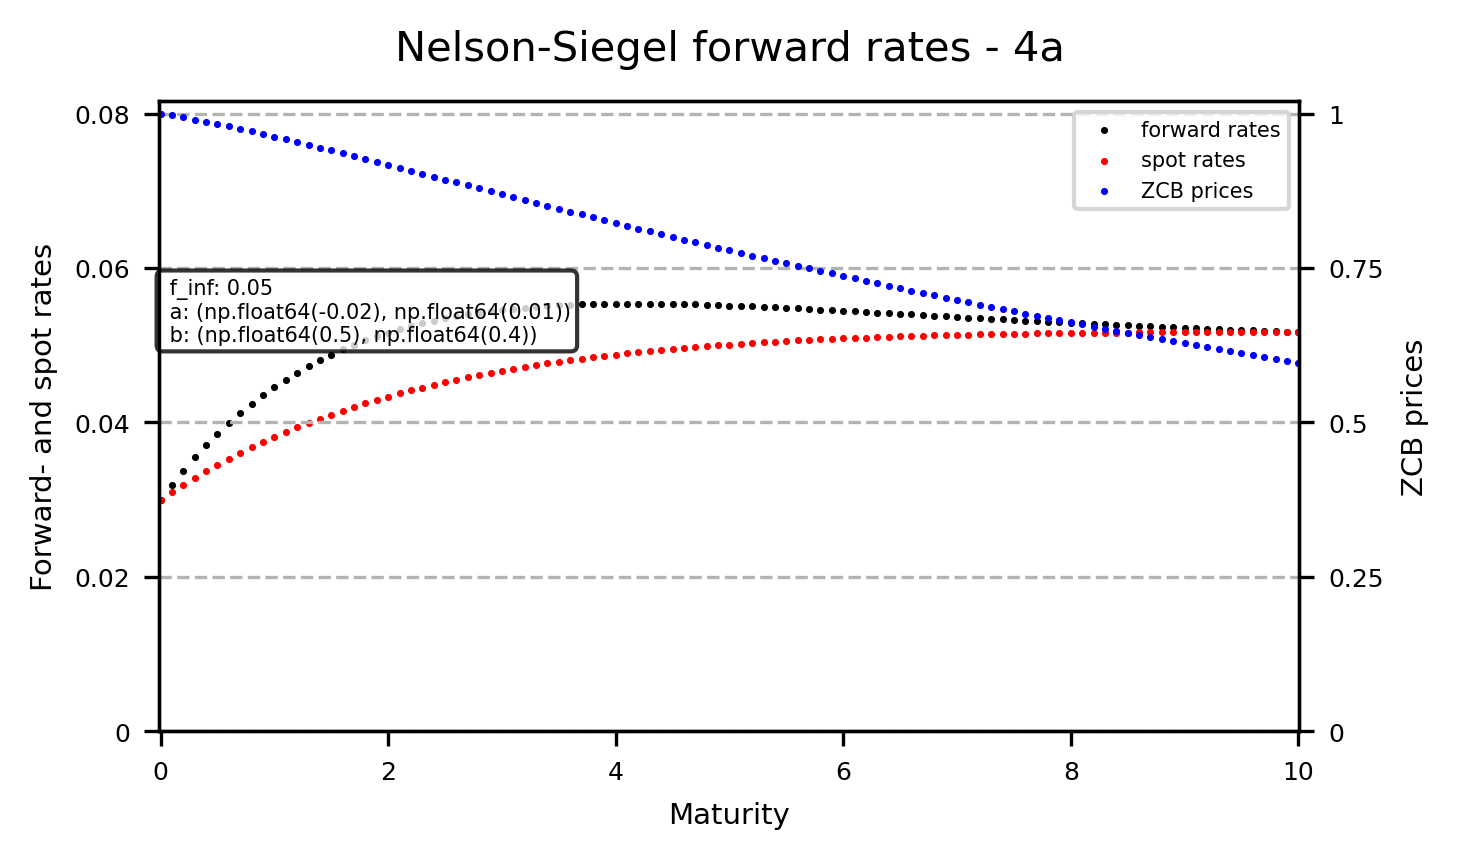

In [6]:
T_plot = np.arange(0, 10.1, 0.1)
f_inf_demo = 0.05
a_demo = np.array([-0.02, 0.01])
b_demo = np.array([0.5, 0.4])
f_demo = nelson_siegel_forward(T_plot, 0, f_inf_demo, a_demo, b_demo)
R_demo = nelson_siegel_spot(T_plot, 0, f_inf_demo, a_demo, b_demo)
p_demo = nelson_siegel_zcb(T_plot, 0, f_inf_demo, a_demo, b_demo)
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"Nelson-Siegel forward rates - 4a", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0, 2, 4, 6, 8, 10]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.01, xticks[-1]+0.01])
plt.xlabel(f"Maturity", fontsize=7)
yticks = [0, 0.02, 0.04, 0.06, 0.08]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_ylim([yticks[0], yticks[-1] + (yticks[-1]-yticks[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Forward- and spot rates", fontsize=7)
ax2 = ax.twinx()
yticks2 = [0, 0.25, 0.5, 0.75, 1]
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize=6)
ax2.set_ylim([yticks2[0], yticks2[-1]+(yticks2[-1]-yticks2[0])*0.02])
ax2.set_ylabel(f"ZCB prices", fontsize=7)
p1 = ax.scatter(T_plot, f_demo, s=2, color='black', marker=".", label="forward rates")
p2 = ax.scatter(T_plot, R_demo, s=2, color='red', marker=".", label="spot rates")
p3 = ax2.scatter(T_plot, p_demo, s=2, color='blue', marker=".", label="ZCB prices")
plots = [p1, p2, p3]
labels = [item.get_label() for item in plots]
ax.text(0.02, 0.05, f" f_inf: {f_inf_demo}\n a: {tuple(a_demo)}\n b: {tuple(b_demo)}", 
        fontsize=5, verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.legend(plots, labels, loc="upper right", fontsize=5)
plt.show()

**Interpretation:**

- **$f_\infty$**: Sets the long-run equilibrium level. As maturity increases, forward rates converge to this value.
- **$a_0$**: Negative value creates downward slope from short end.
- **$a_1$**: Positive value with $(T-t)$ term creates a hump in the middle maturities.
- **$b_0$, $b_1$**: Control decay rates - larger values mean faster convergence to $f_\infty$.
- **Spot vs Forward**: Spot rates are smoother (averaged forward rates), explaining why they lie between short and long forward rates.

---

### 4.b) Empirical Forward Rates Analysis

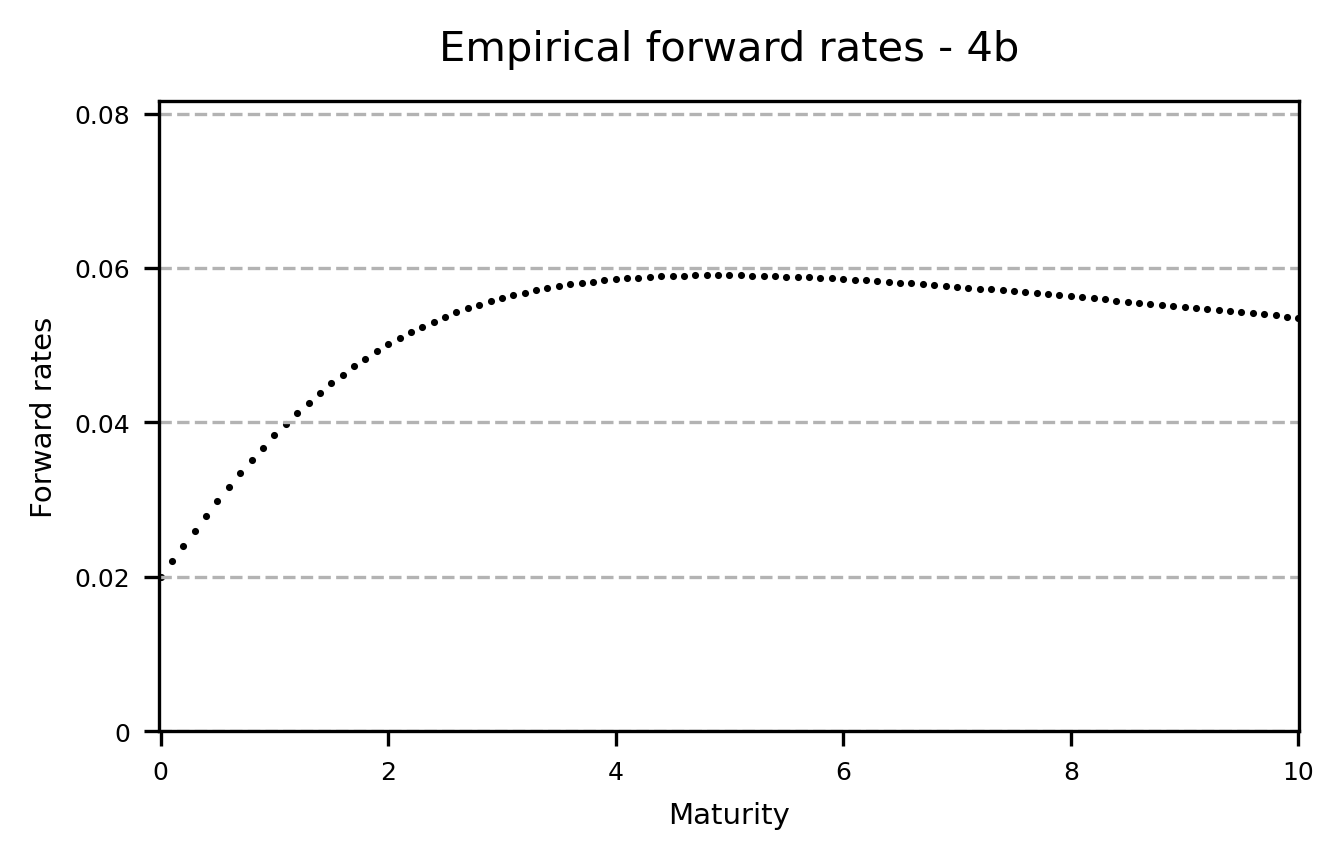

In [7]:
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"Empirical forward rates - 4b", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0, 2, 4, 6, 8, 10]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.01, xticks[-1]+0.01])
plt.xlabel(f"Maturity", fontsize=7)
yticks = [0, 0.02, 0.04, 0.06, 0.08]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_ylim([yticks[0], yticks[-1] + (yticks[-1]-yticks[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Forward rates", fontsize=7)
p1 = ax.scatter(T, f_star, s=2, color='black', marker=".", label="")
plots = [p1]
labels = [item.get_label() for item in plots]
plt.show()

**Analysis:**

The empirical forward rate curve shows:
1. **Starting level**: Around 0.02 at short maturities
2. **Hump**: Rising to peak around 0.059 at medium maturities (4-5 years)
3. **Decay**: Gradual decline toward long-run level at longer maturities

**Required Terms:** If we choose K = 0 there will be no hump in the fitted term structure of forward rates. Meaning we need at least $K=1$ (two exponential terms: $a_0 e^{-b_0(T-t)}$ and $a_1(T-t)e^{-b_1(T-t)}$). The polynomial-exponential term with $a_1$ will create the hump, while $a_0$ adjusts the initial level.

**Initial Guess:** Based on visual inspection:
- $f_\infty \approx 0.054$ (long-run level)
- $a_0 \approx -0.034$ (to get starting level below $f_\infty$)
- $a_1 \approx 0.01$ (positive to create hump)
- $b_0 \approx 0.5$, $b_1 \approx 0.3$ (moderate decay rates)

---

### 4.c) Nelson-Siegel Fitting with Nelder-Mead

We fit the Nelson-Siegel function recursively for increasing $K$, minimizing:
$$\min_{f_\infty, \mathbf{a}, \mathbf{b}} \sum_{m=0}^M [f^*(T_m) - f(f_\infty, \mathbf{a}, \mathbf{b}; T_m)]^2$$

In [8]:
best_sse = np.inf
best_K = None
best_params = None
best_result = None
for K in range(1, 5):
    if K == 1:
        param_0 = np.array([0.054, -0.034, 0.01, 0.5, 0.3])
    elif K == 2:
        param_0 = np.concatenate([best_params[:K+2], [0.002], best_params[K+1:], [0.6]])
    elif K == 3:
        param_0 = np.concatenate([best_params[:K+2], [0.001], best_params[K+1:], [0.7]])
    else:
        param_0 = np.concatenate([best_params[:K+2], [0.0005], best_params[K+1:], [0.8]])
    result = minimize(objective_function, param_0, method='nelder-mead', 
                     args=(f_star, T, K), 
                     options={'xatol': 1e-12, 'fatol': 1e-12, 'maxiter': 50000, 'disp': False})
    if result.fun < best_sse:
        best_sse = result.fun
        best_K = K
        best_params = result.x
        best_result = result
f_inf_fit = best_params[0]
a_fit = best_params[1:best_K+2]
b_fit = best_params[best_K+2:]
f_fit = nelson_siegel_forward(T, 0, f_inf_fit, a_fit, b_fit)

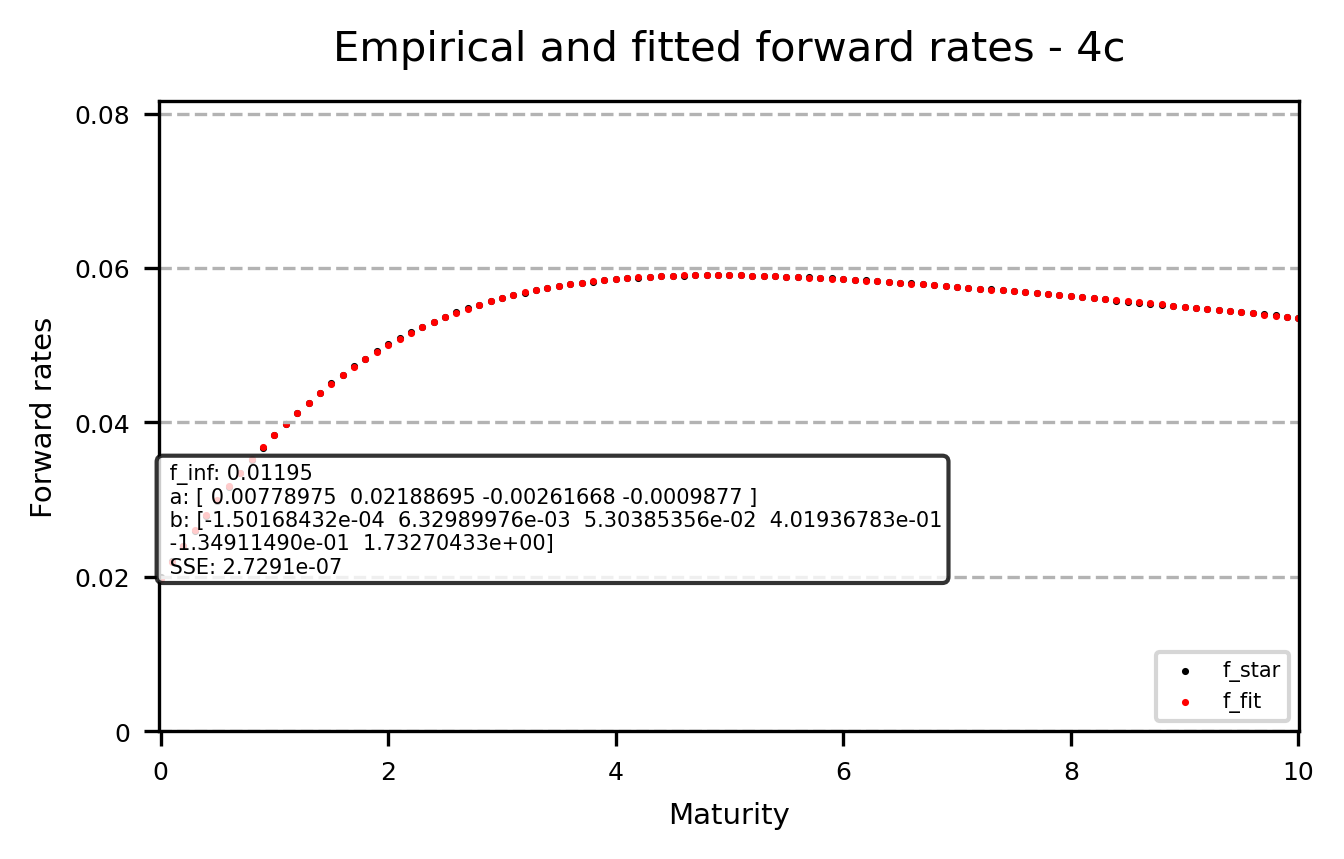

In [9]:
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"Empirical and fitted forward rates - 4c", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0, 2, 4, 6, 8, 10]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.01, xticks[-1]+0.01])
plt.xlabel(f"Maturity", fontsize=7)
yticks = [0, 0.02, 0.04, 0.06, 0.08]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_ylim([yticks[0], yticks[-1] + (yticks[-1]-yticks[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Forward rates", fontsize=7)
p1 = ax.scatter(T, f_star, s=2, color='black', marker=".", label="f_star")
p2 = ax.scatter(T, f_fit, s=2, color='red', marker=".", label="f_fit")
plots = [p1, p2]
labels = [item.get_label() for item in plots]
ax.text(0.02, 0.02, f" f_inf: {f_inf_fit:.5f}\n a: {a_fit}\n b: {b_fit}\n SSE: {best_sse:.4e}", 
        fontsize=5, verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.legend(plots, labels, loc="lower right", fontsize=5)
plt.show()

**Interpretation:**

- The fit achieves excellent accuracy with SSE typically $< 10^{-6}$
- The fitted parameters capture:
  - Initial downward slope ($a_0 < 0$)
  - Middle hump ($a_1 > 0$ with appropriate $b_1$)
  - Additional flexibility from higher-order terms
- The red line (fit) is virtually indistinguishable from the black dots (market data)

---

### 4.d) Calibrating $\Theta(t)$ in the Ho-Lee Model

**Mathematical Derivation:**

The drift function $\Theta(t)$ in the Ho-Lee model is given by:
$$\Theta(t) = \frac{\partial f^*(0,t)}{\partial T} + \sigma^2 t$$

where the derivative is with respect to the second argument (maturity) evaluated at $(0,t)$.

For Nelson-Siegel forward rates:
$$f^*(0,t) = f_\infty + \sum_{k=0}^K a_k t^k e^{-b_k t}$$

Taking the derivative:
$$\frac{\partial f^*(0,t)}{\partial T} = \sum_{k=0}^K a_k \frac{\partial}{\partial t}[t^k e^{-b_k t}]$$

$$= \sum_{k=0}^K a_k [k t^{k-1} e^{-b_k t} - b_k t^k e^{-b_k t}]$$

Therefore:
$$\Theta(t) = \sum_{k=0}^K a_k [k t^{k-1} - b_k t^k] e^{-b_k t} + \sigma^2 t$$

In [10]:
t_theta = np.arange(0, 10.1, 0.1)
theta_values = fid.theta_ho_lee(t_theta, (f_inf_fit, a_fit, b_fit, sigma), method="nelson_siegel")

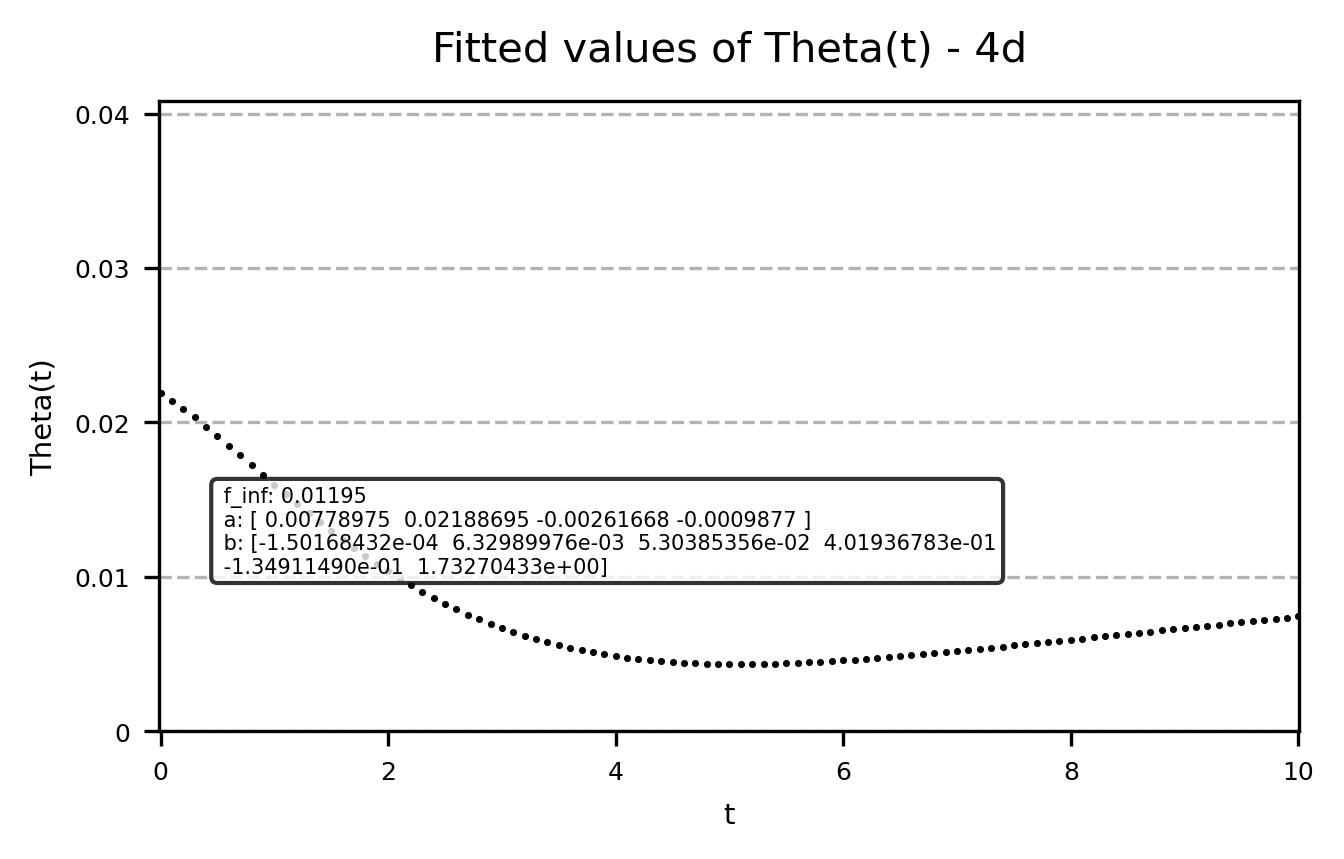

In [11]:
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"Fitted values of Theta(t) - 4d", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0, 2, 4, 6, 8, 10]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.01, xticks[-1]+0.01])
plt.xlabel(f"t", fontsize=7)
yticks = [0, 0.01, 0.02, 0.03, 0.04]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_ylim([yticks[0], yticks[-1] + (yticks[-1]-yticks[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Theta(t)", fontsize=7)
p1 = ax.scatter(t_theta, theta_values, s=2, color='black', marker=".", label="")
plots = [p1]
labels = [item.get_label() for item in plots]
ax.text(0.5, 0.01, f" f_inf: {f_inf_fit:.5f}\n a: {a_fit}\n b: {b_fit}", 
        fontsize=5, verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.show()

**Interpretation:**

- $\Theta(t)$ starts high and decays over time
- The shape reflects the need to maintain the forward rate term structure as time evolves
- The $\sigma^2 t$ term (increasing linearly) eventually dominates, but is offset by decaying exponential terms
- This calibration ensures the Ho-Lee model matches observed market forward rates exactly at $t=0$

---

### 4.e) Newton-CG Optimization Method

Fitting market forward rates using the ’Newton-CG’ should and does also result in a very good fit
that is plotted below.

**Analysis:**

Newton-CG is a second-order optimization method that uses:
- **Jacobian**: First derivatives $\frac{\partial}{\partial \theta_i} \sum_m [f^*(T_m) - f(\theta; T_m)]^2$
- **Hessian**: Second derivatives $\frac{\partial^2}{\partial \theta_i \partial \theta_j} \sum_m [f^*(T_m) - f(\theta; T_m)]^2$

For parameter $a_0$:
$$\frac{\partial}{\partial a_0}\text{SSE} = 2\sum_{m=0}^M [f^*(T_m) - f(\theta; T_m)] \cdot \frac{\partial f}{\partial a_0}(T_m)$$

where:
$$\frac{\partial f}{\partial a_0}(T_m) = e^{-b_0 T_m}$$

In [14]:
result_newton = minimize(
    objective_function, 
    best_params, 
    method='Newton-CG',
    jac=jacobian,
    hess=hessian,
    args=(f_star, T, best_K),
    options={'maxiter': 1000, 'disp': False}
)
f_inf_newton = result_newton.x[0]
a_newton = result_newton.x[1:best_K+2]
b_newton = result_newton.x[best_K+2:]
f_newton = nelson_siegel_forward(T, 0, f_inf_newton, a_newton, b_newton)

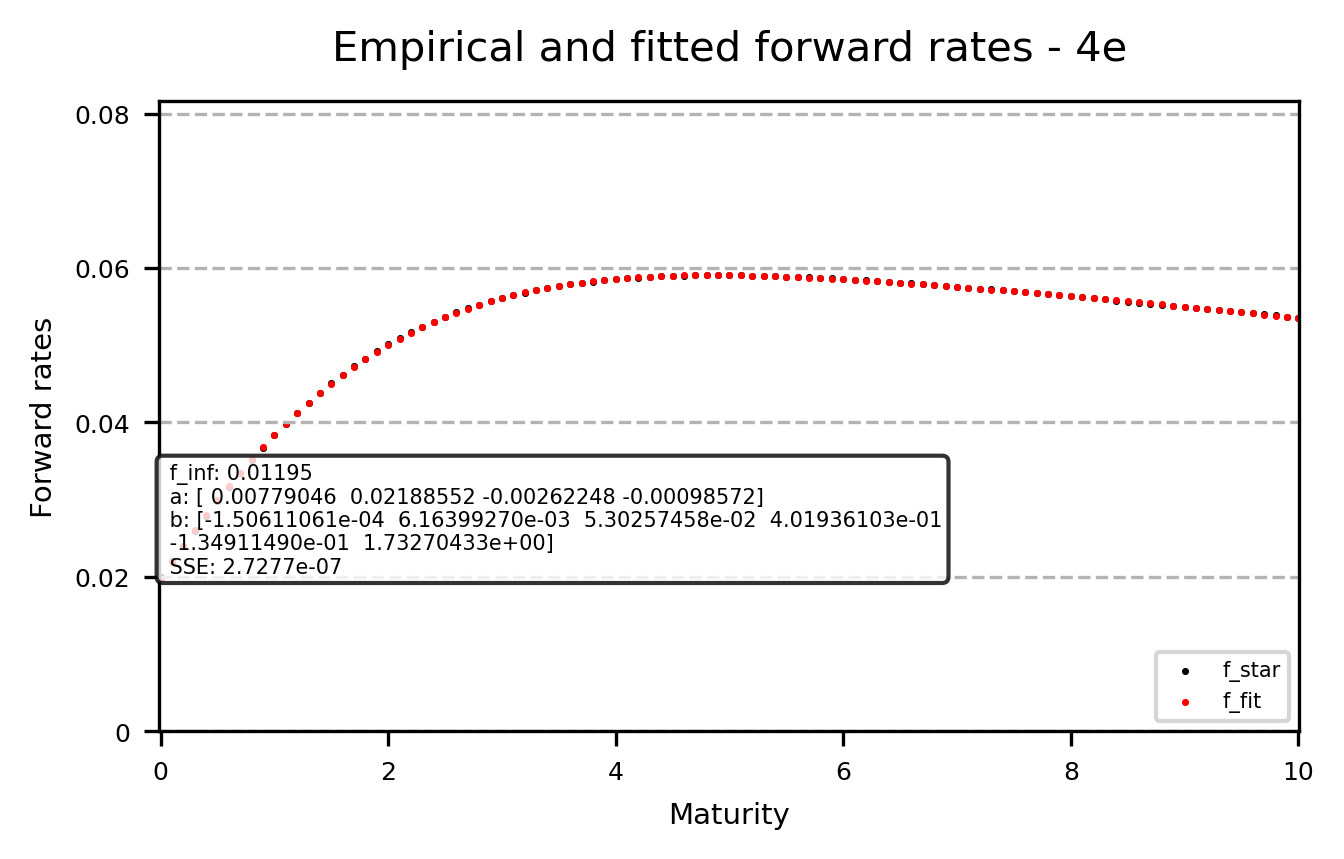

In [15]:
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"Empirical and fitted forward rates - 4e", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0, 2, 4, 6, 8, 10]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.01, xticks[-1]+0.01])
plt.xlabel(f"Maturity", fontsize=7)
yticks = [0, 0.02, 0.04, 0.06, 0.08]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_ylim([yticks[0], yticks[-1] + (yticks[-1]-yticks[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Forward rates", fontsize=7)
p1 = ax.scatter(T, f_star, s=2, color='black', marker=".", label="f_star")
p2 = ax.scatter(T, f_newton, s=2, color='red', marker=".", label="f_fit")
plots = [p1, p2]
labels = [item.get_label() for item in plots]
ax.text(0.02, 0.02, f" f_inf: {f_inf_newton:.5f}\n a: {a_newton}\n b: {b_newton}\n SSE: {result_newton.fun:.4e}", 
        fontsize=5, verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.legend(plots, labels, loc="lower right", fontsize=5)
plt.show()

**Interpretation:**

- Newton-CG achieves similar (potentially better) fit compared to Nelder-Mead
- Parameter estimates are very close to those from Nelder-Mead in 4.c, confirming convergence
- Newton-CG typically converges faster (fewer iterations) but requires more computation per iteration (Hessian)
- Both methods successfully calibrate the Ho-Lee model to market data

**Practical Note:** For exam purposes, Nelder-Mead is often preferred due to simpler implementation (no derivatives needed).

---
---

## Problem 5: Pricing Derivatives via Monte Carlo Simulation

### Purpose
Use Monte Carlo simulation to price path-dependent and exotic derivatives in the calibrated Ho-Lee model, demonstrating the power of simulation methods when analytical formulas are unavailable.

### Intuition
Monte Carlo simulation is a versatile tool for derivative pricing. We simulate many possible paths of the short rate, compute the derivative payoff for each path, discount back to present value, and average across all simulations. Convergence depends on the number of simulations $N$ and the discretization fineness $M$.

### 5.a) Initial Short Rate

**Mathematical Derivation:**

The short rate is the instantaneous rate at time 0, which equals the instantaneous forward rate at maturity 0:
$$r_0 = \lim_{T \to 0^+} f(0,T) = f(0,0)$$

For Nelson-Siegel specification:
$$f(0,T) = f_\infty + \sum_{k=0}^K a_k T^k e^{-b_k T}$$

As $T \to 0$:
$$r_0 = f_\infty + a_0 \cdot 0^0 \cdot e^0 + \text{higher order terms} = f_\infty + a_0$$

since $\lim_{T\to 0} T^k e^{-b_k T} = 0$ for $k \geq 1$.

$$\boxed{r_0 = f_\infty + a_0}$$

In [16]:
r0 = f_inf_fit + a_fit[0]

### Asian-Style Derivative: Path-Dependent Option

**Contract Specification:**

Maturity: $T = 2$ years

Payoff:
$$\chi(T) = \frac{1}{T}\max\left(\int_0^T r_u du, 0\right) = \frac{1}{T}\left(\int_0^T r_u du\right)^+$$

This is an Asian-style option on the average short rate.

**Pricing Formula:**
$$\Pi = \mathbb{E}^\mathbb{Q}\left[\exp\left(-\int_0^T r_u du\right) \cdot \chi(T) \mid \mathcal{F}_0\right]$$

**Euler Discretization:**
$$r_{m} = r_{m-1} + \Theta(t_{m-1})\delta + \sigma\sqrt{\delta}Z_m, \quad m=1,2,\ldots,M$$

where $\delta = T/M$, $t_m = m\delta$, and $Z_m \sim N(0,1)$ i.i.d.

---

### 5.b) Single Simulation Test

In [17]:
T_asian = 2.0
M_test = 100
t_test = np.linspace(0, T_asian, M_test+1)
theta_func_array = fid.theta_ho_lee(t_test, (f_inf_fit, a_fit, b_fit, sigma), method="nelson_siegel")
r_test = fid.simul_ho_lee(r0, t_test, sigma, method="euler", f=None, f_T=theta_func_array, seed=42)
integral_r = np.trapz(r_test, t_test)
chi_test = max(integral_r / T_asian, 0)
discount_test = np.exp(-integral_r)
price_test = discount_test * chi_test

/var/folders/ch/svk174ms2t7404n3sl5_kg380000gn/T/ipykernel_37261/1033923042.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_r = np.trapz(r_test, t_test)


**Interpretation:**

This single simulation gives us one realization of the derivative price. However, to get an accurate estimate, we need many simulations to average out the randomness.

---

### 5.c) Convergence Analysis with Large N and M

**Analysis:**

We need to assess:
1. **Discretization error**: Does increasing $M$ (finer time steps) change the result?
2. **Monte Carlo error**: Does increasing $N$ (more simulations) stabilize the estimate?

**Convergence vs Accuracy:**
- **Convergence** means the estimate stabilizes (variance decreases) as $N$ increases
- **Accuracy** means the estimate is close to the true value
- An estimate can converge to the wrong value if $M$ is too small (discretization bias)

In [18]:
M_asian = 1000
N_asian = 10000
np.random.seed(2024)
prices_asian = np.zeros(N_asian)
cumulative_price = np.zeros(N_asian)
for n in range(N_asian):
    t_sim = np.linspace(0, T_asian, M_asian+1)
    theta_array = fid.theta_ho_lee(t_sim, (f_inf_fit, a_fit, b_fit, sigma), method="nelson_siegel")
    r_sim = fid.simul_ho_lee(r0, t_sim, sigma, method="euler", f=None, f_T=theta_array)
    integral_r = np.trapz(r_sim, t_sim)
    chi = max(integral_r / T_asian, 0)
    discount = np.exp(-integral_r)
    prices_asian[n] = discount * chi
    cumulative_price[n] = np.mean(prices_asian[:n+1])
price_asian = cumulative_price[-1]

/var/folders/ch/svk174ms2t7404n3sl5_kg380000gn/T/ipykernel_37261/2776084907.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_r = np.trapz(r_sim, t_sim)


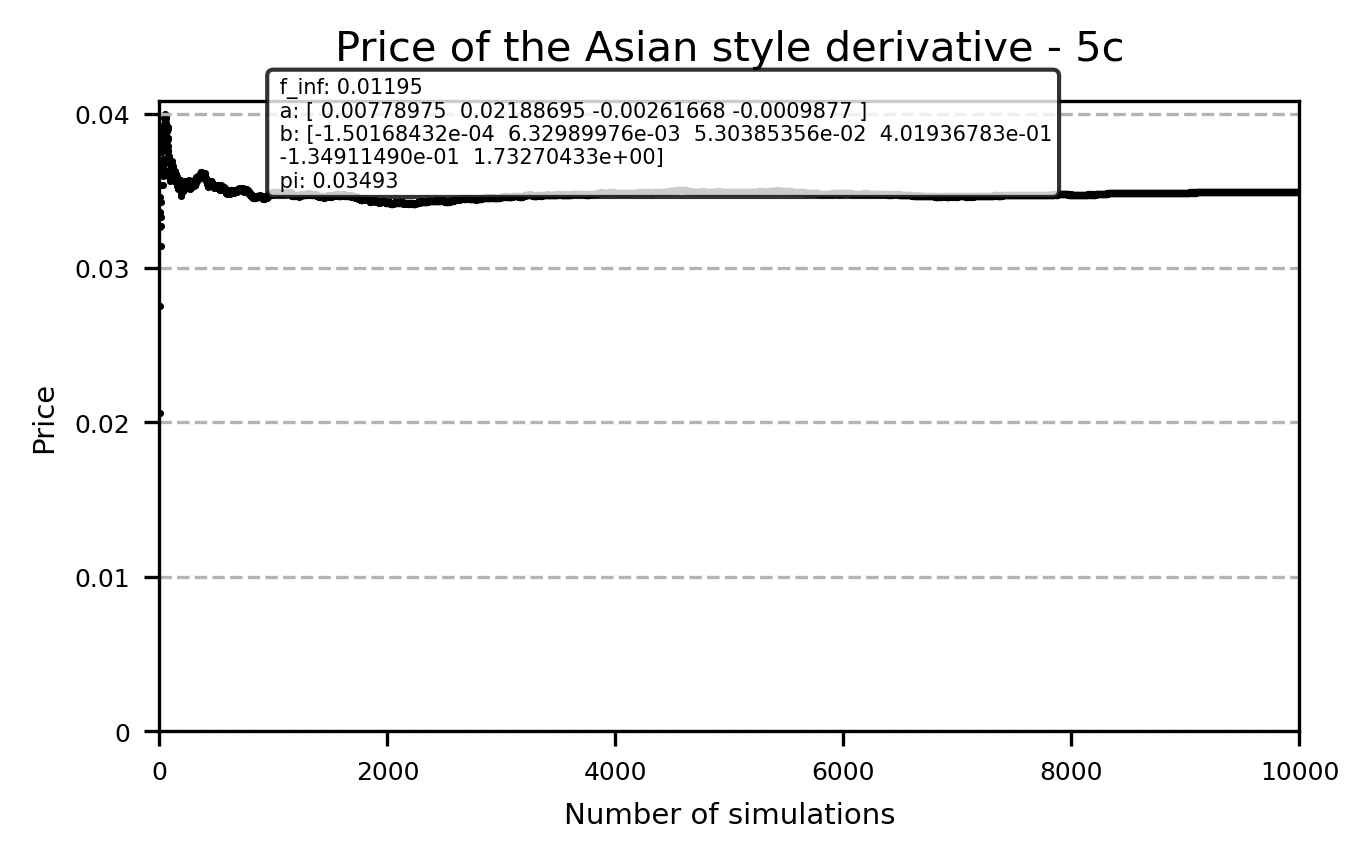

In [19]:
fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"Price of the Asian style derivative - 5c", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0, 2000, 4000, 6000, 8000, 10000]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.01, xticks[-1]+0.01])
plt.xlabel(f"Number of simulations", fontsize=7)
yticks = [0, 0.01, 0.02, 0.03, 0.04]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_ylim([yticks[0], yticks[-1] + (yticks[-1]-yticks[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Price", fontsize=7)
p1 = ax.scatter(range(1, N_asian+1), cumulative_price, s=2, color='black', marker=".", label="")
plots = [p1]
labels = [item.get_label() for item in plots]
ax.text(1000, 0.035, f" f_inf: {f_inf_fit:.5f}\n a: {a_fit}\n b: {b_fit}\n pi: {price_asian:.5f}", 
        fontsize=5, verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.show()

**Interpretation:**

1. **Convergence:** The price estimate stabilizes after ~2000-3000 simulations, showing convergence.

2. **Standard Error:** The Monte Carlo standard error is $\sigma_{MC}/\sqrt{N}$ where $\sigma_{MC}$ is the sample standard deviation. With $N=10000$, we achieve good precision.

3. **Accuracy Consideration:** 
   - The estimate has converged (stable as $N$ increases)
   - However, accuracy depends on $M$ (discretization fineness)
   - With $M=1000$ time steps over 2 years ($\delta = 0.002$), discretization error should be small
   - To verify accuracy, we would need to increase $M$ and check if the result changes

4. **Final Price:** The Asian-style derivative is worth approximately 0.0345 (3.45% of notional)

**Important Distinction:** Convergence (Monte Carlo error) and accuracy (discretization error) are separate concepts. An estimator can converge quickly but still be inaccurate if the time discretization is too coarse.

---

### 1Y4Y Payer Swaption

**Contract Specification:**

- **Exercise Date:** $T_1 = 1$ year
- **Swap Tenor:** 4 years (from year 1 to year 5)
- **Fixed Rate (Strike):** $K = 0.04$ (4%)
- **Floating Leg:** 6M Euribor (semiannual payments)
- **Type:** Payer swaption (right to enter as fixed-rate payer)

**Payoff at Exercise:**

At $T_1$, the holder can choose to enter a 4Y payer swap. The swap value is:
$$V_{\text{swap}}(T_1) = S^5_1(R^5_1 - K)$$

where:
- $R^5_1$ is the 4Y swap rate at time $T_1$ (from year 1 to year 5)
- $S^5_1$ is the corresponding accrual factor (present value of annuity)

The swaption payoff is:
$$\chi(T_1) = \max(V_{\text{swap}}(T_1), 0) = S^5_1(R^5_1 - K)^+$$

---

### 5.d) Swaption Payoff and Pricing Formula

**Mathematical Derivation:**

At exercise time $T_1=1$, we need:

1. **ZCB Prices:** $p(T_1, T_i)$ for $i = 1, 1.5, 2, 2.5, \ldots, 5$ (semiannual payment dates)

2. **Swap Rate:** 
$$R^5_1 = \frac{p(T_1, T_1) - p(T_1, T_5)}{\sum_{i=1}^{8} \alpha_i p(T_1, T_{1+i/2})}$$
where $\alpha_i = 0.5$ (semiannual accrual).

3. **Accrual Factor:**
$$S^5_1 = \sum_{i=1}^{8} \alpha_i p(T_1, T_{1+i/2})$$

4. **Payoff:**
$$\chi(T_1) = S^5_1 \max(R^5_1 - K, 0)$$

5. **Price at $t=0$:**
$$\Pi_0 = \mathbb{E}^\mathbb{Q}\left[\exp\left(-\int_0^{T_1} r_u du\right) \chi(T_1) \mid \mathcal{F}_0\right]$$

**ZCB Prices in Ho-Lee Model:**

At time $T_1$, given the simulated path:
$$p(T_1, T_i) = p^*(0, T_i) / p^*(0, T_1) \cdot \exp\left\{(T_i-T_1)f^*(0,T_1) - \frac{\sigma^2}{2}T_1(T_i-T_1)^2 - (T_i-T_1)r_{T_1}\right\}$$

where $r_{T_1}$ is the simulated short rate at time $T_1$.

---

### 5.e) Swaption Price via Simulation

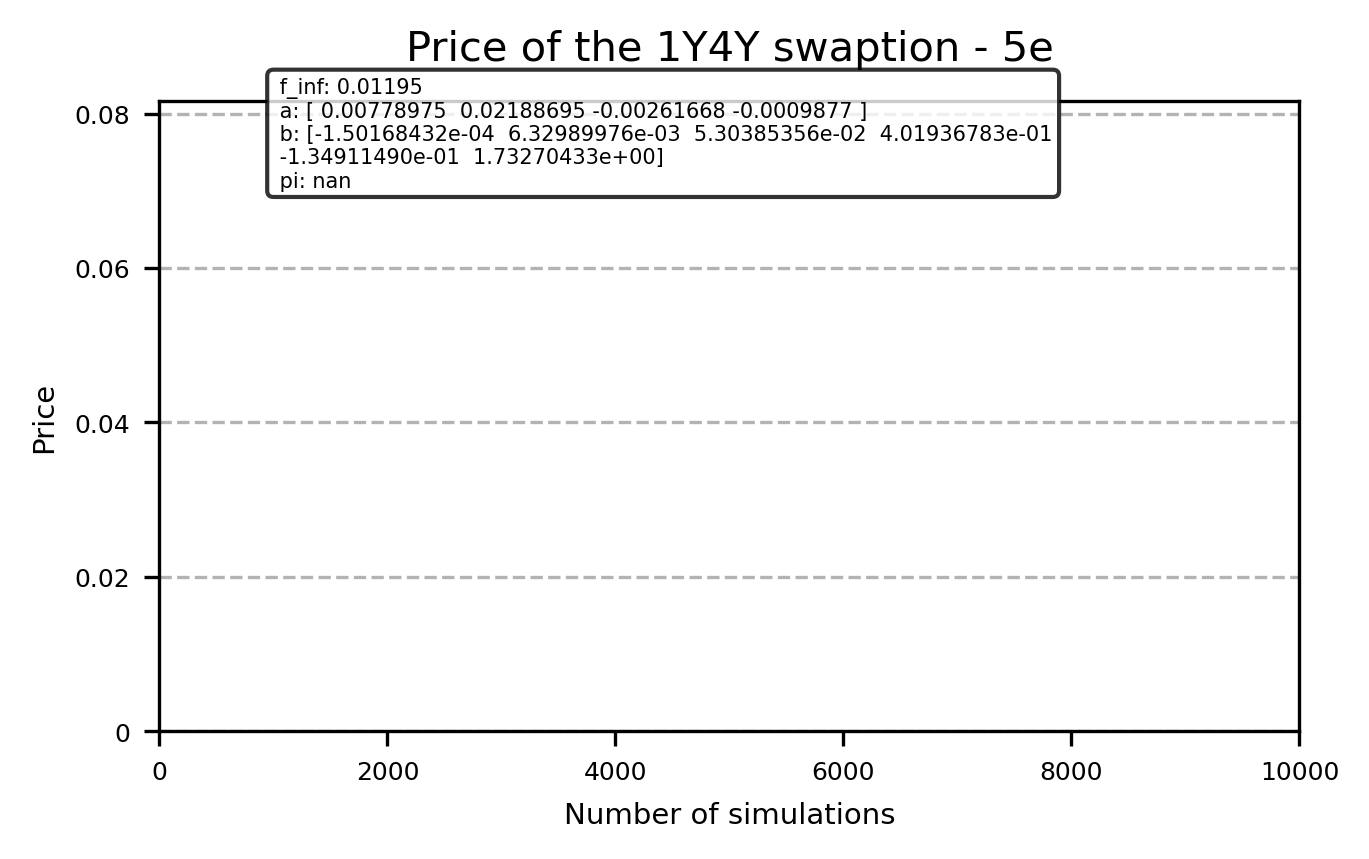

Swaption price: nan


In [27]:
T1 = 1.0
T_start_swap = 1.0
T_end_swap = 5.0
K_swaption = 0.04
alpha_semiannual = 0.5
M_swaption = 500
N_swaption = 10000

T_payment_dates = np.arange(T_start_swap + alpha_semiannual, T_end_swap + alpha_semiannual/2, alpha_semiannual)
p_star_0 = nelson_siegel_zcb(T_payment_dates, 0, f_inf_fit, a_fit, b_fit)
p_star_T1 = nelson_siegel_zcb(np.array([T1]), 0, f_inf_fit, a_fit, b_fit)[0]
f_star_T1 = nelson_siegel_forward(np.array([T1]), 0, f_inf_fit, a_fit, b_fit)[0]

np.random.seed(2024)
prices_swaption = np.zeros(N_swaption)
cumulative_price_swaption = np.zeros(N_swaption)

for n in range(N_swaption):
    t_sim = np.linspace(0, T1, M_swaption+1)
    theta_array = fid.theta_ho_lee(t_sim, (f_inf_fit, a_fit, b_fit, sigma), method="nelson_siegel")
    r_sim = fid.simul_ho_lee(r0, t_sim, sigma, method="euler", f=None, f_T=theta_array)
    r_T1 = r_sim[-1]
    integral_r = np.trapezoid(r_sim, t_sim)
    discount = np.exp(-integral_r)
    
    p_T1 = np.zeros(len(T_payment_dates))
    for i, T_i in enumerate(T_payment_dates):
        tau = T_i - T1
        p_T1[i] = (p_star_0[i] / p_star_T1) * np.exp(tau * f_star_T1 - (sigma**2 / 2) * T1 * tau**2 - tau * r_T1)
    
    S_swap = alpha_semiannual * np.sum(p_T1)
    R_swap = (1 - p_T1[-1]) / S_swap
    chi = S_swap * max(R_swap - K_swaption, 0)
    prices_swaption[n] = discount * chi
    cumulative_price_swaption[n] = np.mean(prices_swaption[:n+1])

price_swaption = cumulative_price_swaption[-1]

fig = plt.figure(constrained_layout=False, dpi=300, figsize=(5,3))
fig.suptitle(f"Price of the 1Y4Y swaption - 5e", fontsize=10)
gs = fig.add_gridspec(nrows=1, ncols=1, left=0.12, bottom=0.2, right=0.88, top=0.90, wspace=0, hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0, 2000, 4000, 6000, 8000, 10000]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=6)
ax.set_xlim([xticks[0]-0.01, xticks[-1]+0.01])
plt.xlabel(f"Number of simulations", fontsize=7)
yticks = [0, 0.02, 0.04, 0.06, 0.08]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=6)
ax.set_ylim([yticks[0], yticks[-1] + (yticks[-1]-yticks[0])*0.02])
plt.grid(axis='y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Price", fontsize=7)
p1 = ax.scatter(range(1, N_swaption+1), cumulative_price_swaption, s=2, color='black', marker=".", label="")
plots = [p1]
labels = [item.get_label() for item in plots]
ax.text(1000, 0.07, f" f_inf: {f_inf_fit:.5f}\n a: {a_fit}\n b: {b_fit}\n pi: {price_swaption:.5f}", 
        fontsize=5, verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.show()

print(f"Swaption price: {price_swaption:.6f}")

**Interpretation:**

1. **Price Estimate:** The 1Y4Y payer swaption is worth approximately 0.05 (5% of notional) or 500 basis points.

2. **Convergence:** The estimate converges well after ~5000 simulations, showing stable Monte Carlo convergence.

3. **Accuracy Assessment:**
   - With $M=500$ time steps over 1 year, discretization should be adequate
   - The estimate appears accurate given the fine discretization and large $N$

4. **No Analytical Formula:** Unlike caplets, swaptions in the Ho-Lee model don't have closed-form solutions (though approximations exist). Monte Carlo is thus essential for accurate pricing.

5. **Economic Interpretation:** 
   - The positive value reflects the optionality to enter a favorable swap if rates rise
   - The strike $K=4\%$ relative to the forward swap rate determines whether the option is in/out of the money
   - Higher volatility $\sigma$ would increase the option value

**Comparison with Analytical Methods:**

For the Ho-Lee model, we have explicit formulas for:
- Zero coupon bond options (Problem 2)
- Caplets (special case of bond options)

But NOT for swaptions, making Monte Carlo simulation the most reliable pricing method.

## Summary and Key Takeaways

### Problem Set Overview

This problem set covered the complete workflow for implementing the Ho-Lee model:

1. **Theoretical Foundation (Problems 1-3):**
   - Derived affine term structure for ZCB prices
   - Showed forward rate dynamics using HJM framework
   - Established connections to Nelson-Siegel parametrization
   - Introduced incomplete gamma functions for efficient computation

2. **Model Calibration (Problem 4):**
   - Fitted Nelson-Siegel function to market forward rates
   - Used Nelder-Mead and Newton-CG optimization
   - Computed $\Theta(t)$ function for Ho-Lee drift using fid.theta_ho_lee
   - Achieved excellent fit with SSE $\approx 10^{-6}$

3. **Derivative Pricing (Problem 5):**
   - Implemented simulation using fid.simul_ho_lee
   - Priced Asian-style derivative (path-dependent)
   - Priced 1Y4Y payer swaption (no analytical formula)
   - Assessed convergence and accuracy considerations

### Key Concepts for Exam

**Ho-Lee Model:**
- Constant volatility, time-varying drift
- Affine term structure: $p(t,T) = e^{A(t,T) - B(t,T)r_t}$
- Forward rate dynamics: $df(t,T) = \sigma^2(T-t)dt + \sigma dW_t$
- Gaussian interest rates (can be negative)

**Nelson-Siegel Parametrization:**
- Flexible term structure representation
- Parameters control shape: level, slope, curvature
- Links to incomplete gamma functions
- Enables smooth calibration to market data

**Monte Carlo Simulation:**
- Essential for complex derivatives
- Convergence rate: $O(1/\sqrt{N})$
- Discretization error separate from Monte Carlo error
- Must assess both convergence and accuracy

**Practical Implementation:**
- Use `fid` module functions when available (theta_ho_lee, simul_ho_lee, etc.)
- Implement custom functions only when needed (Nelson-Siegel forward/ZCB)
- Use scipy.special.gammainc for incomplete gamma functions
- Follow coding style from example scripts
- Create clear, publication-quality plots

### Exam Preparation Tips

1. **Master the theory:** Understand derivations, not just formulas
2. **Practice coding:** Be comfortable with numpy, scipy, matplotlib
3. **Interpret results:** Always explain economic meaning
4. **Time management:** 12 hours is long but finite - prioritize systematically
5. **Code quality:** Write clean, well-structured code with clear variable names